## 평가 - MNIST 손글씨 분류기 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

- 데이터 탐색

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
digits.data[0], digits.target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

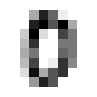

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
plt.axis('off');

In [7]:
digits.data.min(), digits.data.max()

(0.0, 16.0)

- Is it seven?

In [10]:
X = digits.data / digits.data.max()
y = (digits.target == 7).astype(int)    # True/False --> 1/0

In [11]:
y[:5]

array([0, 0, 0, 0, 0])

In [12]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1618,  179], dtype=int64))

- Support Vector Machine으로 분류

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2023
)

svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
pred_sv = svc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_sv)

0.9977777777777778

- 엉터리 분류기: 무조건 0을 반환

In [16]:
from sklearn.base import BaseEstimator

class MyClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros(X.shape[0], int)

In [17]:
myc = MyClassifier()
myc.fit(X_train, y_train)
pred_my = myc.predict(X_test)
accuracy_score(y_test, pred_my)

0.9

- 평가

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(confusion_matrix(y_test, pred_sv))
print(confusion_matrix(y_test, pred_my))

[[405   0]
 [  1  44]]
[[405   0]
 [ 45   0]]


In [19]:
precision_score(y_test, pred_sv), precision_score(y_test, pred_my)

c:\Users\human\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1.0, 0.0)

In [20]:
recall_score(y_test, pred_sv), recall_score(y_test, pred_my)

(0.9777777777777777, 0.0)